In [13]:
import pandas as pd
file_path = '/content/Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20241128.csv'
data = pd.read_csv(file_path)
data.head(), data.info(), data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1918 non-null   object 
 1   Local Route   1918 non-null   int64  
 2   Light Rail    1918 non-null   int64  
 3   Peak Service  1918 non-null   int64  
 4   Rapid Route   1918 non-null   int64  
 5   School        1918 non-null   int64  
 6   Other         1898 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 105.0+ KB


(         Date  Local Route  Light Rail  Peak Service  Rapid Route  School  \
 0  30/08/2024        16436       10705           225        19026    3925   
 1  15/09/2023        15499       10671           267        18421    4519   
 2  28/12/2021         1756        2352             0         3775       0   
 3  11/01/2023        10536        8347           223        14072       0   
 4  11/09/2021          820         612             0         1283       0   
 
    Other  
 0   59.0  
 1   61.0  
 2   13.0  
 3   48.0  
 4   11.0  ,
 None,
         Local Route    Light Rail  Peak Service   Rapid Route       School  \
 count   1918.000000   1918.000000   1918.000000   1918.000000  1918.000000   
 mean    9891.395203   7195.446298    179.581335  12597.213243  2352.694995   
 std     6120.715714   3345.616428    156.532738   6720.494557  2494.766306   
 min        1.000000      0.000000      0.000000      0.000000     0.000000   
 25%     3044.500000   4463.500000      0.000000   6383

In [14]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data = data.sort_values(by='Date')
data['Other'] = data['Other'].fillna(data['Other'].median())
data.info(), data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1918 entries, 1013 to 160
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1918 non-null   datetime64[ns]
 1   Local Route   1918 non-null   int64         
 2   Light Rail    1918 non-null   int64         
 3   Peak Service  1918 non-null   int64         
 4   Rapid Route   1918 non-null   int64         
 5   School        1918 non-null   int64         
 6   Other         1918 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 119.9 KB


(None,
            Date  Local Route  Light Rail  Peak Service  Rapid Route  School  \
 1013 2019-07-01        15987        9962           407        21223    3715   
 1120 2019-07-02        16895       10656           409        21715    3993   
 1451 2019-07-03        16613       10658           427        22025    3638   
 1171 2019-07-04        16604       10445           437        21868    3576   
 1523 2019-07-05        16040       10532           400        20697    2856   
 
       Other  
 1013   40.0  
 1120   40.0  
 1451   40.0  
 1171   40.0  
 1523   40.0  )

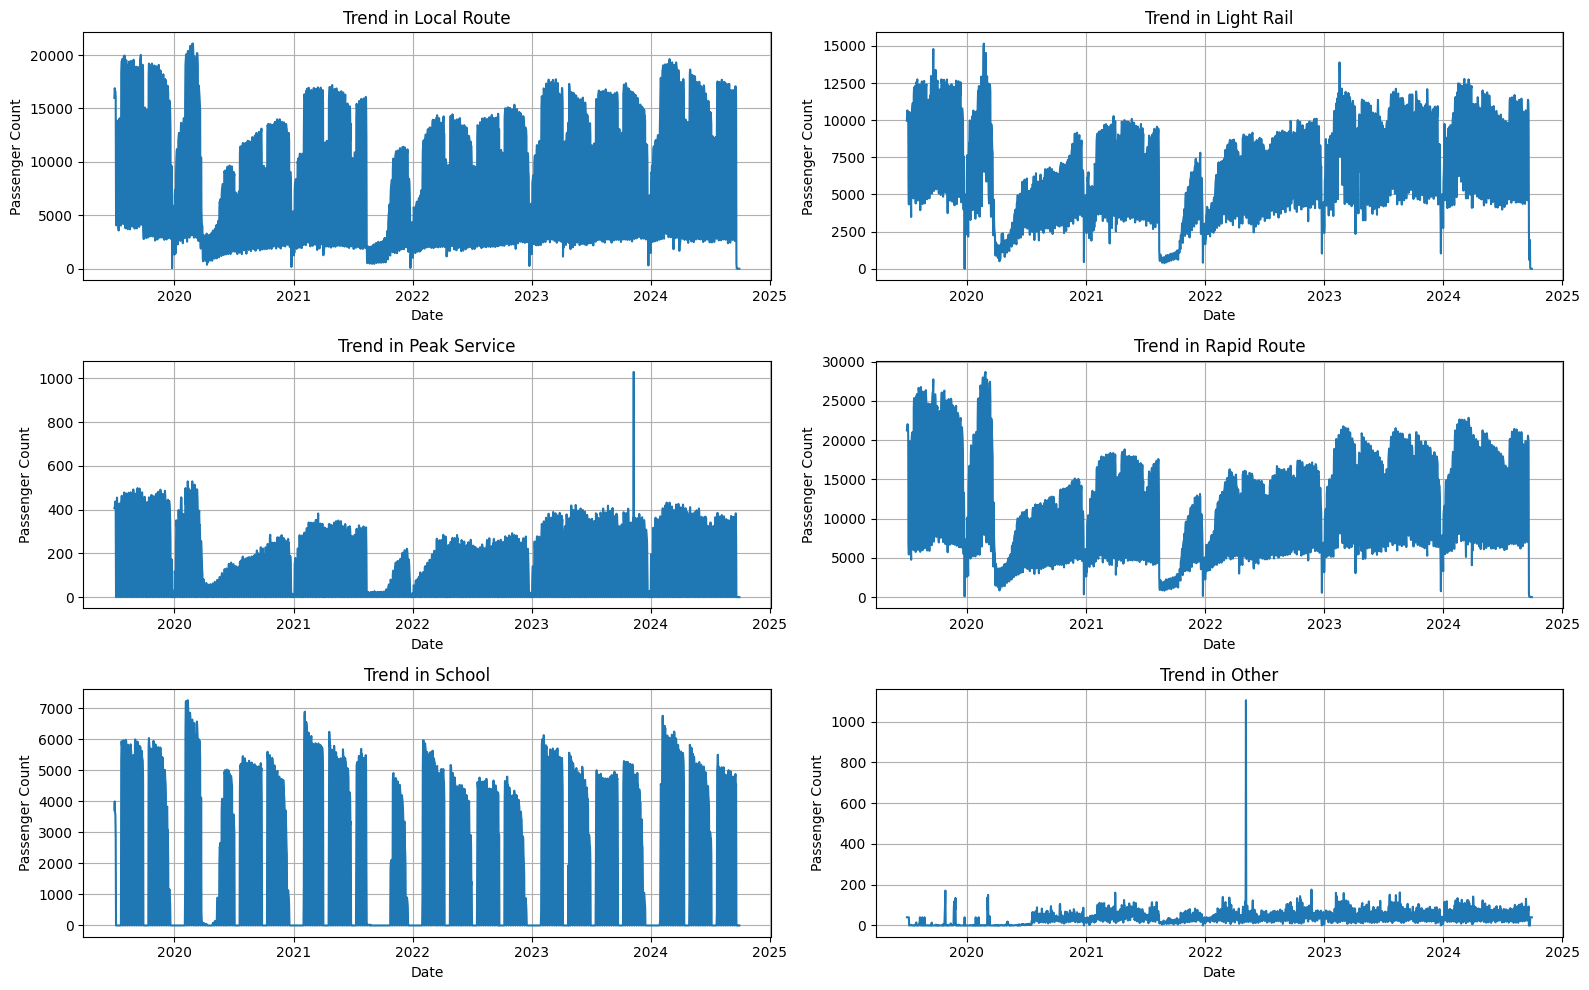

In [15]:
import matplotlib.pyplot as plt
service_columns = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']
plt.figure(figsize=(16, 10))
for i, column in enumerate(service_columns, 1):
    plt.subplot(3, 2, i)
    plt.plot(data['Date'], data[column], label=column, color='tab:blue')
    plt.title(f"Trend in {column}", fontsize=12)
    plt.xlabel('Date')
    plt.ylabel('Passenger Count')
    plt.grid()
    plt.tight_layout()

plt.show()

<Figure size 1200x800 with 0 Axes>

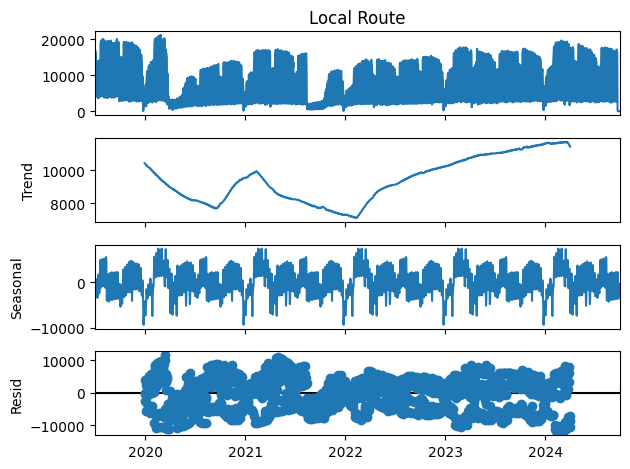

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
local_route_series = data.set_index('Date')['Local Route']
decomposition = seasonal_decompose(local_route_series, model='additive', period=365)
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.tight_layout()
plt.show()

In [17]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

DEBUG:cmdstanpy:input tempfile: /tmp/tmprha76ebc/1fa752oz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprha76ebc/wbav019m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66686', 'data', 'file=/tmp/tmprha76ebc/1fa752oz.json', 'init=/tmp/tmprha76ebc/wbav019m.json', 'output', 'file=/tmp/tmprha76ebc/prophet_models2dmo3cb/prophet_model-20241128061222.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:12:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



Forecasting for Local Route...


06:12:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


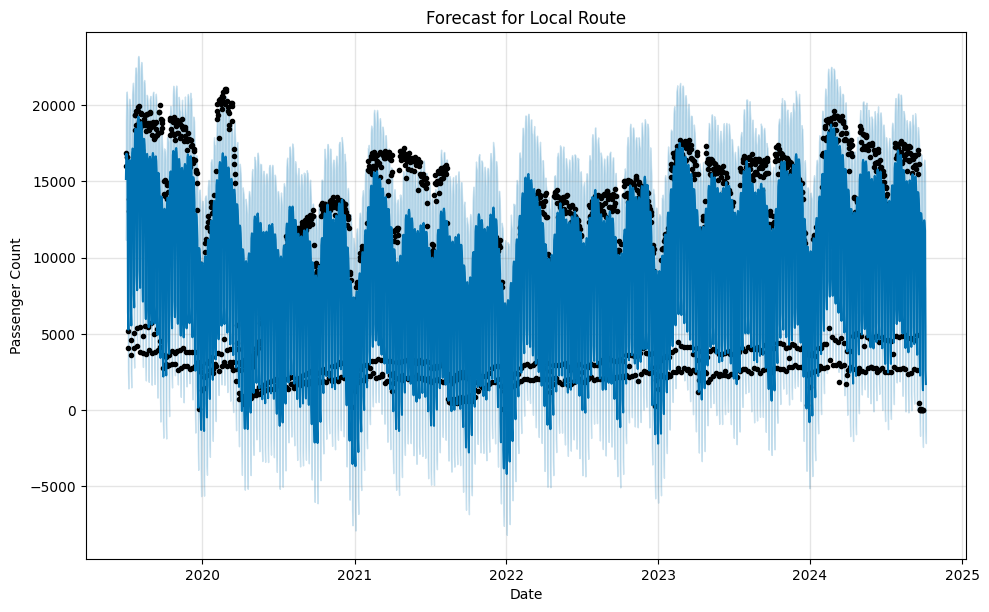

DEBUG:cmdstanpy:input tempfile: /tmp/tmprha76ebc/q9q_1tos.json



Forecasting for Light Rail...


DEBUG:cmdstanpy:input tempfile: /tmp/tmprha76ebc/e0goepwz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34423', 'data', 'file=/tmp/tmprha76ebc/q9q_1tos.json', 'init=/tmp/tmprha76ebc/e0goepwz.json', 'output', 'file=/tmp/tmprha76ebc/prophet_model739ybrf6/prophet_model-20241128061224.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:12:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:12:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


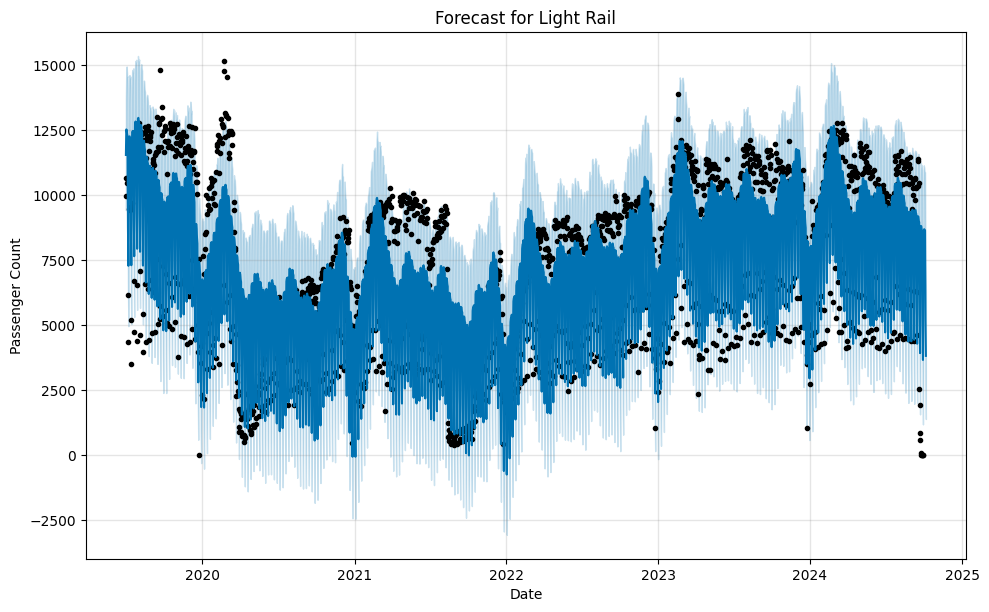

DEBUG:cmdstanpy:input tempfile: /tmp/tmprha76ebc/byfe0tto.json



Forecasting for Peak Service...


DEBUG:cmdstanpy:input tempfile: /tmp/tmprha76ebc/9iwffa2g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35170', 'data', 'file=/tmp/tmprha76ebc/byfe0tto.json', 'init=/tmp/tmprha76ebc/9iwffa2g.json', 'output', 'file=/tmp/tmprha76ebc/prophet_modeloo36ggya/prophet_model-20241128061226.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:12:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:12:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


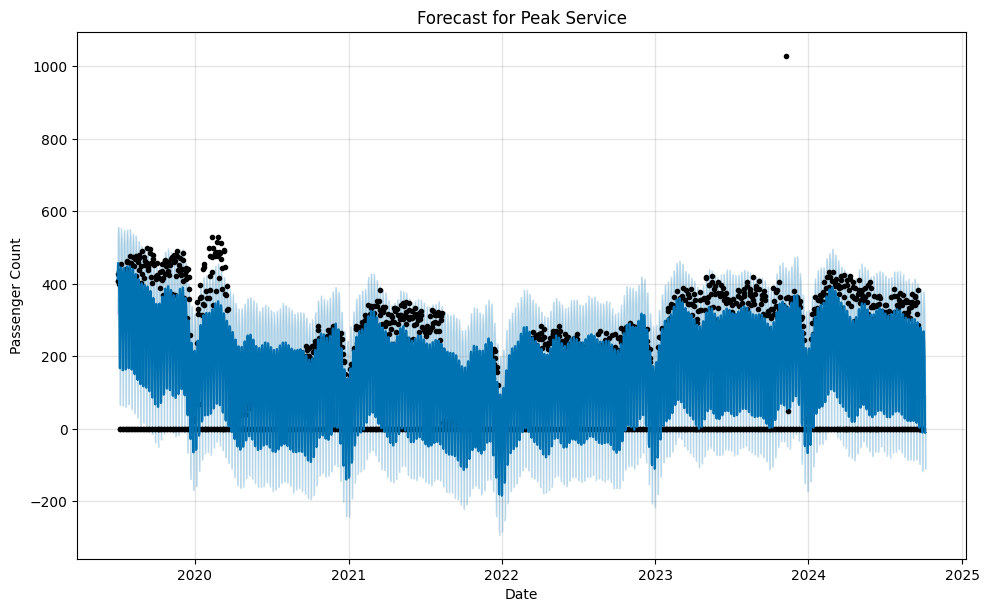

DEBUG:cmdstanpy:input tempfile: /tmp/tmprha76ebc/0tm51a6w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprha76ebc/j17o4tn8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None



Forecasting for Rapid Route...


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90489', 'data', 'file=/tmp/tmprha76ebc/0tm51a6w.json', 'init=/tmp/tmprha76ebc/j17o4tn8.json', 'output', 'file=/tmp/tmprha76ebc/prophet_modelh3bl62zz/prophet_model-20241128061228.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:12:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:12:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


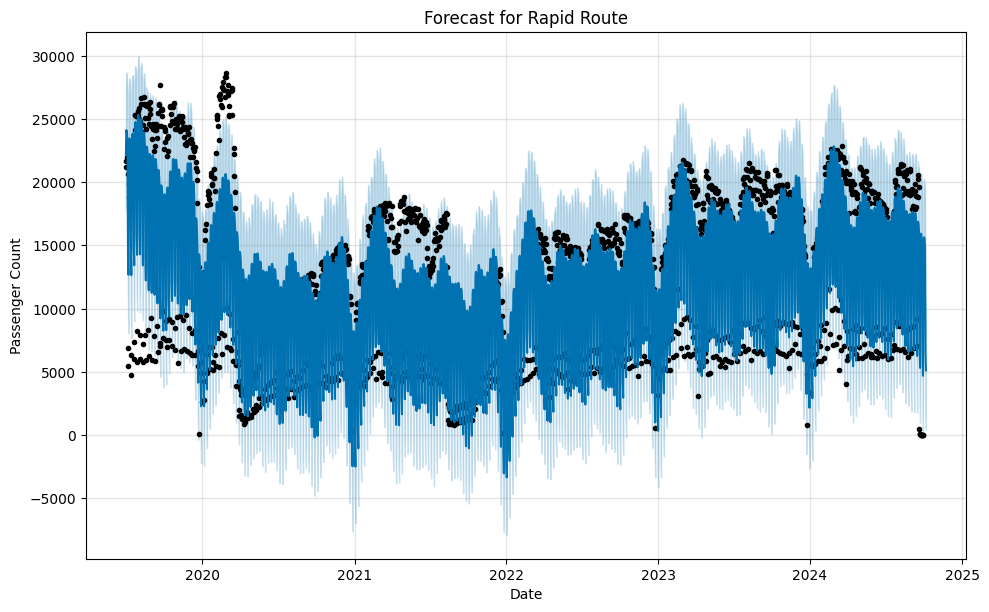

DEBUG:cmdstanpy:input tempfile: /tmp/tmprha76ebc/epw6fjf_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprha76ebc/bujn54bl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31572', 'data', 'file=/tmp/tmprha76ebc/epw6fjf_.json', 'init=/tmp/tmprha76ebc/bujn54bl.json', 'output', 'file=/tmp/tmprha76ebc/prophet_modelmkf5zzzy/prophet_model-20241128061229.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']



Forecasting for School...


06:12:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:12:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


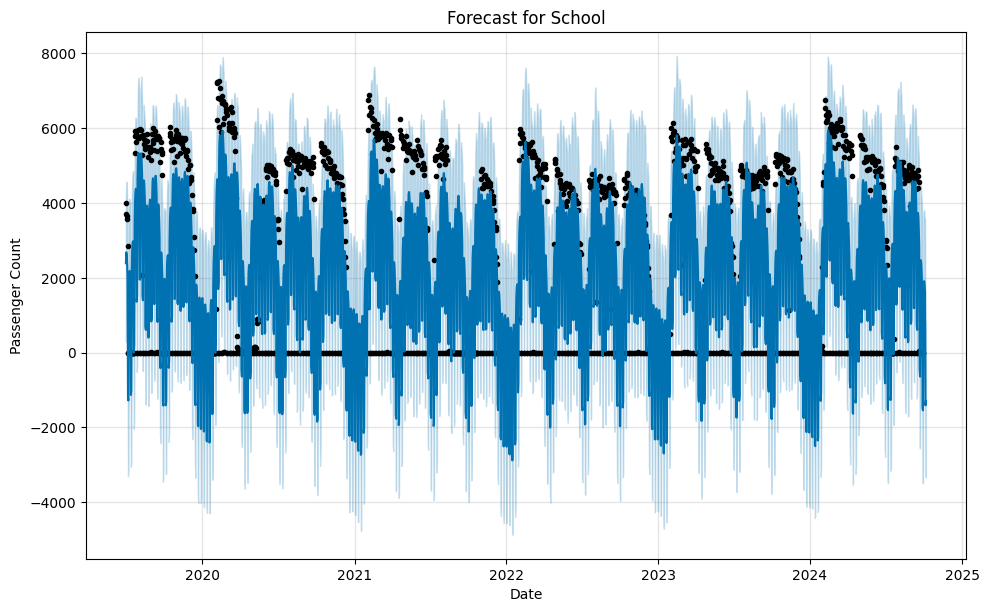

DEBUG:cmdstanpy:input tempfile: /tmp/tmprha76ebc/5mkr7l6e.json



Forecasting for Other...


DEBUG:cmdstanpy:input tempfile: /tmp/tmprha76ebc/1v9tam8r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59522', 'data', 'file=/tmp/tmprha76ebc/5mkr7l6e.json', 'init=/tmp/tmprha76ebc/1v9tam8r.json', 'output', 'file=/tmp/tmprha76ebc/prophet_model0i3tewwi/prophet_model-20241128061231.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:12:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:12:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


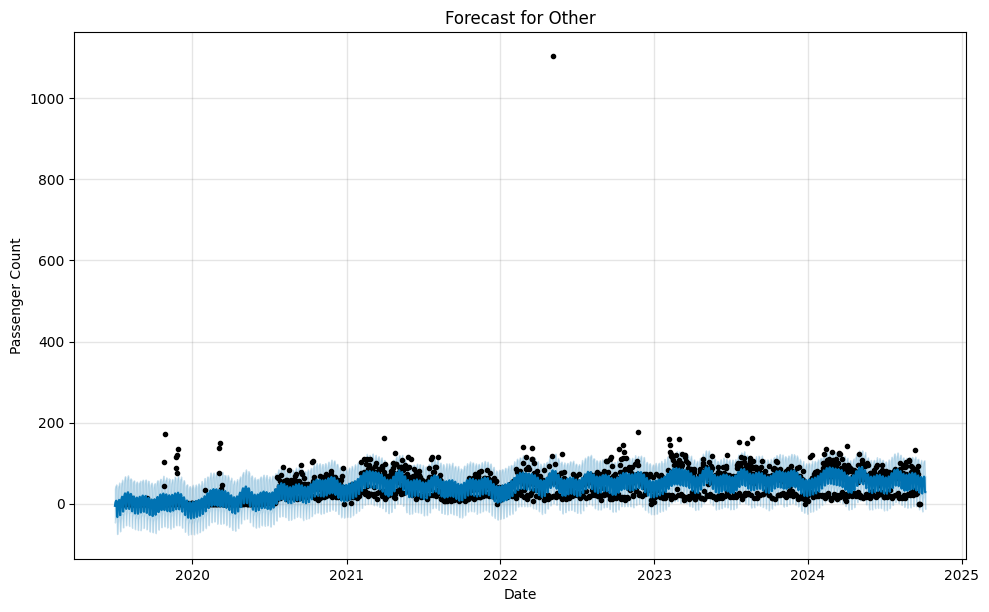

In [18]:
file_path = '/content/Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20241128.csv'
data = pd.read_csv(file_path)
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data = data.sort_values(by='Date')
def forecast_service(data, service_type, days=7):
    df = data[['Date', service_type]].rename(columns={'Date': 'ds', service_type: 'y'})
    model = Prophet(yearly_seasonality=True, daily_seasonality=False)
    model.fit(df)
    future = model.make_future_dataframe(periods=days)
    forecast = model.predict(future)
    model.plot(forecast)
    plt.title(f"Forecast for {service_type}")
    plt.xlabel("Date")
    plt.ylabel("Passenger Count")
    plt.show()

    return forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
service_types = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']
forecasts = {}

for service in service_types:
    print(f"\nForecasting for {service}...")
    forecasts[service] = forecast_service(data, service, days=7)


In [19]:
from prophet import Prophet
import pandas as pd
file_path = '/content/Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20241128.csv'
data = pd.read_csv(file_path)

# Preprocess data
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data = data.sort_values(by='Date')

# Function to forecast for a single service type and return the numerical values
def forecast_service(data, service_type, days=7):
    # Prepare the data for Prophet
    df = data[['Date', service_type]].rename(columns={'Date': 'ds', service_type: 'y'})

    # Initialize and fit the Prophet model
    model = Prophet(yearly_seasonality=True, daily_seasonality=False)
    model.fit(df)

    # Create a dataframe for future dates
    future = model.make_future_dataframe(periods=days)

    # Forecast the future
    forecast = model.predict(future)

    # Extract the relevant columns
    forecast_values = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(days)
    return forecast_values

# Forecast for each service type and store the results
service_types = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']
forecast_results = {}

for service in service_types:
    print(f"\nForecasting for {service}...")
    forecast_results[service] = forecast_service(data, service, days=7)

# Display the forecasted values
for service, forecast in forecast_results.items():
    print(f"\nForecasted values for {service}:")
    print(forecast)


DEBUG:cmdstanpy:input tempfile: /tmp/tmprha76ebc/zemwfsy9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprha76ebc/usp788p5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46808', 'data', 'file=/tmp/tmprha76ebc/zemwfsy9.json', 'init=/tmp/tmprha76ebc/usp788p5.json', 'output', 'file=/tmp/tmprha76ebc/prophet_modelrbc0d3bs/prophet_model-20241128061234.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:12:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



Forecasting for Local Route...


06:12:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmprha76ebc/p0omb996.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprha76ebc/xmtz_m6c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59575', 'data', 'file=/tmp/tmprha76ebc/p0omb996.json', 'init=/tmp/tmprha76ebc/xmtz_m6c.json', 'output', 'file=/tmp/tmprha76ebc/prophet_modelvlrmjulb/prophet_model-20241128061235.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:12:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



Forecasting for Light Rail...


06:12:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmprha76ebc/dbxoxd6l.json



Forecasting for Peak Service...


DEBUG:cmdstanpy:input tempfile: /tmp/tmprha76ebc/_j6pvqkq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6738', 'data', 'file=/tmp/tmprha76ebc/dbxoxd6l.json', 'init=/tmp/tmprha76ebc/_j6pvqkq.json', 'output', 'file=/tmp/tmprha76ebc/prophet_modeldxsfpnq5/prophet_model-20241128061236.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:12:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:12:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmprha76ebc/75ifm1_k.json



Forecasting for Rapid Route...


DEBUG:cmdstanpy:input tempfile: /tmp/tmprha76ebc/s2aa_s8g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77786', 'data', 'file=/tmp/tmprha76ebc/75ifm1_k.json', 'init=/tmp/tmprha76ebc/s2aa_s8g.json', 'output', 'file=/tmp/tmprha76ebc/prophet_model5znksa2_/prophet_model-20241128061237.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:12:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:12:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmprha76ebc/a3vyqjcr.json



Forecasting for School...


DEBUG:cmdstanpy:input tempfile: /tmp/tmprha76ebc/x29fnev7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14986', 'data', 'file=/tmp/tmprha76ebc/a3vyqjcr.json', 'init=/tmp/tmprha76ebc/x29fnev7.json', 'output', 'file=/tmp/tmprha76ebc/prophet_modelmoplqvt5/prophet_model-20241128061238.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:12:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:12:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmprha76ebc/kl743jid.json



Forecasting for Other...


DEBUG:cmdstanpy:input tempfile: /tmp/tmprha76ebc/x158zfgx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64088', 'data', 'file=/tmp/tmprha76ebc/kl743jid.json', 'init=/tmp/tmprha76ebc/x158zfgx.json', 'output', 'file=/tmp/tmprha76ebc/prophet_modelvx4imh1p/prophet_model-20241128061239.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:12:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:12:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Forecasted values for Local Route:
             ds          yhat   yhat_lower    yhat_upper
1918 2024-09-30  10495.099677  6343.360682  14300.665085
1919 2024-10-01  12290.212671  8176.016222  16276.385058
1920 2024-10-02  12454.564899  8284.833597  16520.667867
1921 2024-10-03  12304.106031  8507.800373  15961.875165
1922 2024-10-04  11774.630519  7830.078036  16027.970971
1923 2024-10-05   2626.683795 -1478.308750   6393.878071
1924 2024-10-06   1701.722160 -2145.678726   5504.423031

Forecasted values for Light Rail:
             ds         yhat   yhat_lower    yhat_upper
1918 2024-09-30  7583.443077  5153.359266   9957.074295
1919 2024-10-01  8637.506094  6226.225033  10844.122614
1920 2024-10-02  8680.287395  6386.119259  10929.900741
1921 2024-10-03  8599.768342  6160.534201  10850.075208
1922 2024-10-04  8629.938528  6151.983521  10823.892464
1923 2024-10-05  5166.143206  2838.321631   7447.624298
1924 2024-10-06  3808.671451  1429.304250   6170.917153

Forecasted values for Pe